In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### Rank 20 Matrix Inversion

In [4]:
# non-patchwise baselien
baseline = pd.read_csv('results/inverse_rank-20_mlp_diffsteps-10_starttime_2025-10-10_00-08-06.csv')

baseline_patchsize_10 = pd.read_csv('results/inverse_rank-20_mlp-patch_patchsize-10_diffsteps-10_starttime_2025-10-10_00-07-27_patch-baseline.csv')
baseline_patchsize_20 = pd.read_csv('results/inverse_rank-20_mlp-patch_patchsize-20_diffsteps-10_starttime_2025-10-10_00-07-27_patch-baseline.csv')
baseline_patchsize_40 = pd.read_csv('results/inverse_rank-20_mlp-patch_patchsize-40_diffsteps-10_starttime_2025-10-10_00-08-47_patch-baseline.csv')
patch_baselines = [baseline_patchsize_10, baseline_patchsize_20, baseline_patchsize_40]

patch_trained_patchsize_10 = pd.read_csv('results/inverse_rank-20_mlp-patch_patchsize-10_diffsteps-10_starttime_2025-10-10_00-08-47.csv')
patch_trained_patchsize_20 = pd.read_csv('results/inverse_rank-20_mlp-patch_patchsize-20_diffsteps-10_starttime_2025-10-10_00-07-57.csv')
patch_trained_patchsize_40 = pd.read_csv('results/inverse_rank-20_mlp-patch_patchsize-40_diffsteps-10_starttime_2025-10-10_00-07-57.csv')
patch_trained = [patch_trained_patchsize_10, patch_trained_patchsize_20, patch_trained_patchsize_40]

In [17]:
def plot_datasplit_mse(df_list, df_labels, title):
    train_dfs = []
    validation_dfs = []
    for df in df_list:
        train_df = df[df['datasplit'] == 'Train']
        val_df = df[df['datasplit'] == 'Validation']
        train_dfs.append(train_df)
        validation_dfs.append(val_df)
    
    plt.figure(figsize=(10, 6))
    for i, train_df in enumerate(train_dfs):
        plt.plot(train_df['iteration'], train_df['mse'], label=df_labels[i])
    plt.xlabel('Training step #')
    plt.ylabel('Mean squared error')
    plt.title(f"{title} (training)" if title else "Training MSE")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f"results/figures/{title}_training.png" if title else "results/figures/training.png")
    plt.show()

    plt.figure(figsize=(10, 6))
    for i, val_df in enumerate(validation_dfs):
        plt.plot(val_df['iteration'], val_df['mse'], label=df_labels[i])
    plt.xlabel('Training step #')
    plt.ylabel('Mean squared error')
    plt.title(f"{title} (validation)" if title else "Validation MSE")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f"results/figures/{title}_validation.png" if title else "results/figures/validation.png")
    plt.show()


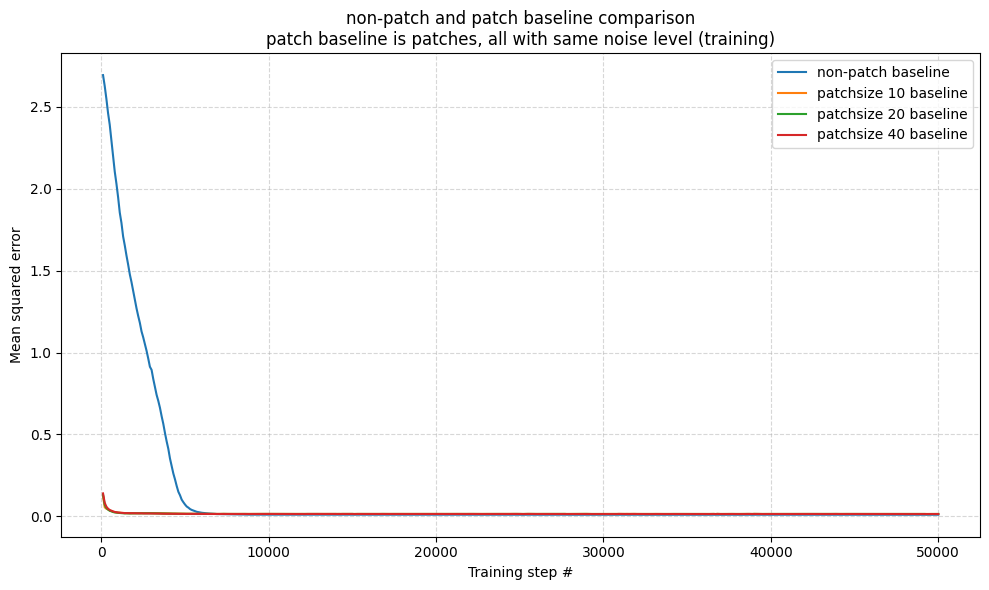

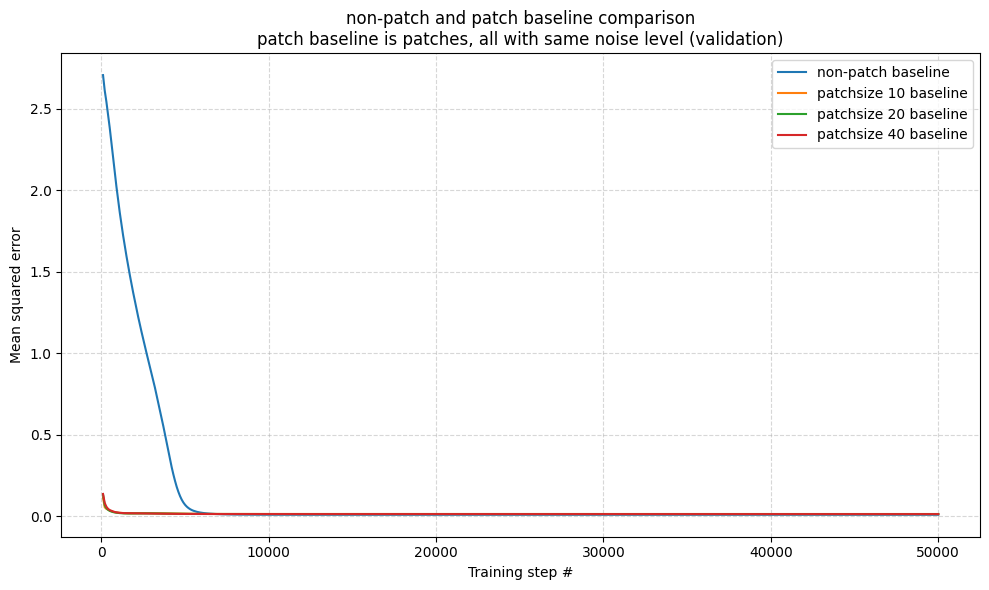

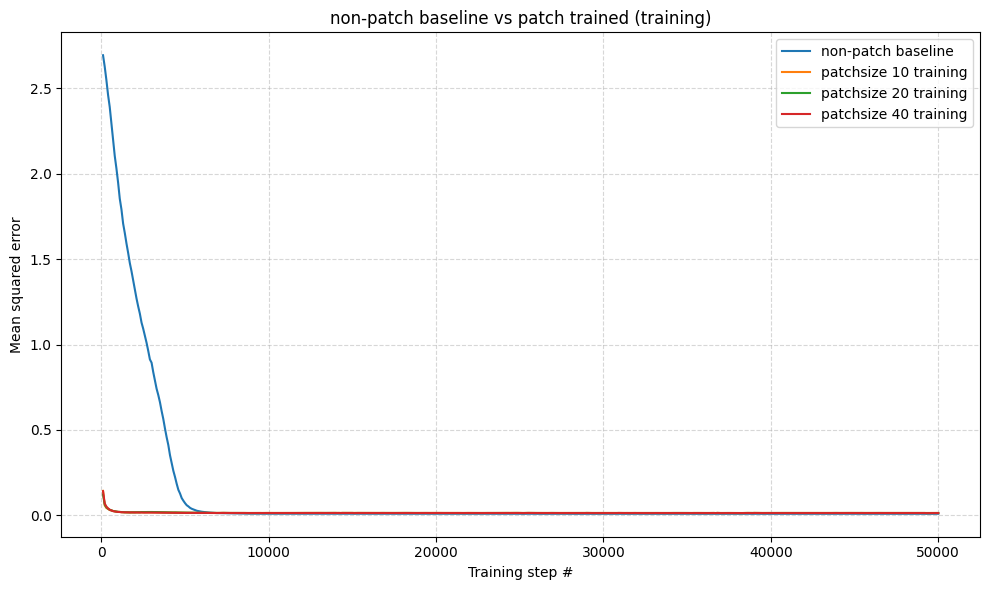

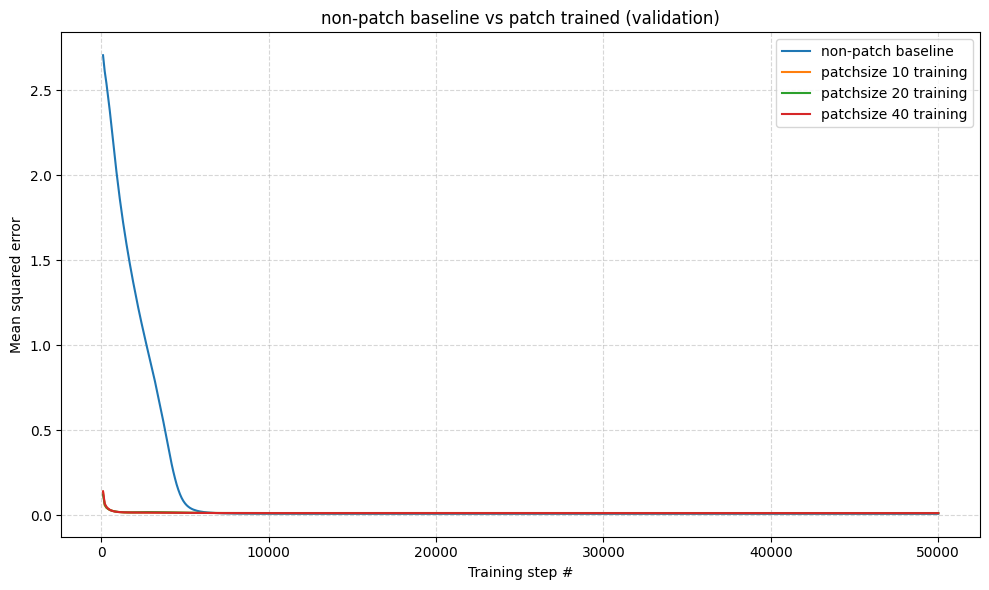

In [18]:
all_baselines = [baseline, *patch_baselines]
baseline_vs_patched = [baseline, *patch_trained]

plot_datasplit_mse(all_baselines, ['non-patch baseline', 'patchsize 10 baseline', 'patchsize 20 baseline', 'patchsize 40 baseline'], 'non-patch and patch baseline comparison\npatch baseline is patches, all with same noise level')
plot_datasplit_mse(baseline_vs_patched, ['non-patch baseline', 'patchsize 10 training', 'patchsize 20 training', 'patchsize 40 training'], 'non-patch baseline vs patch trained')


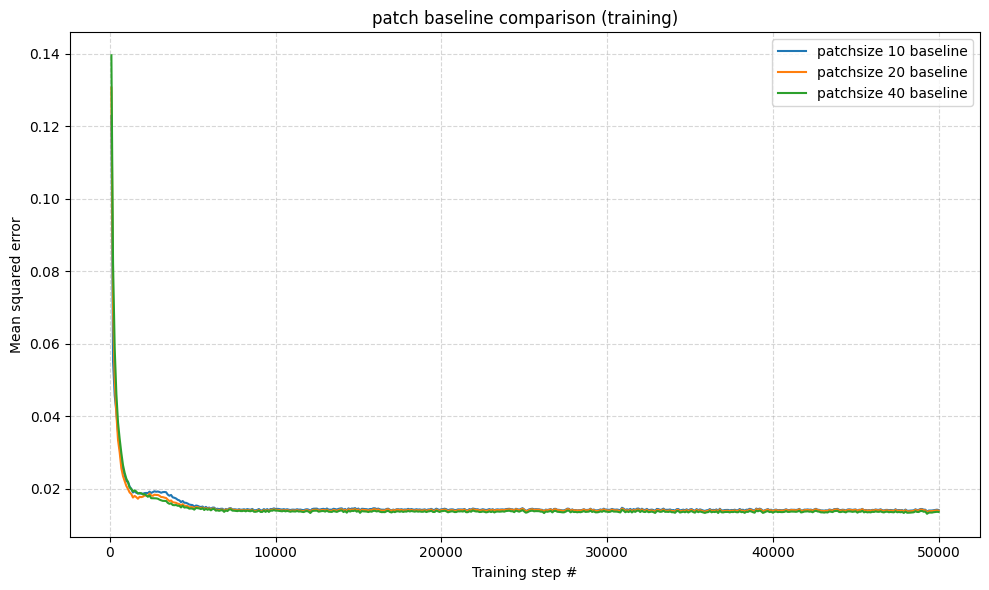

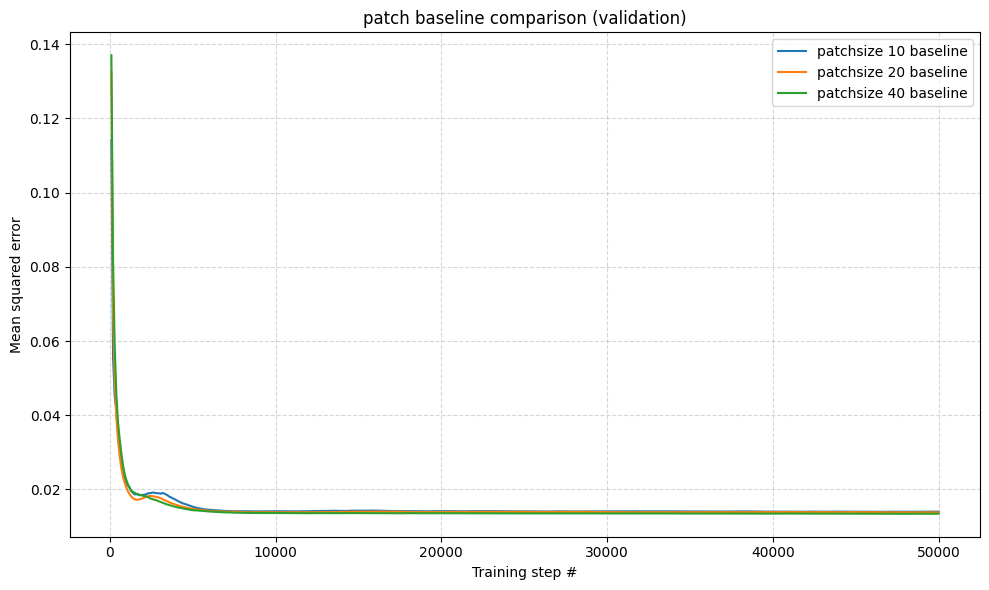

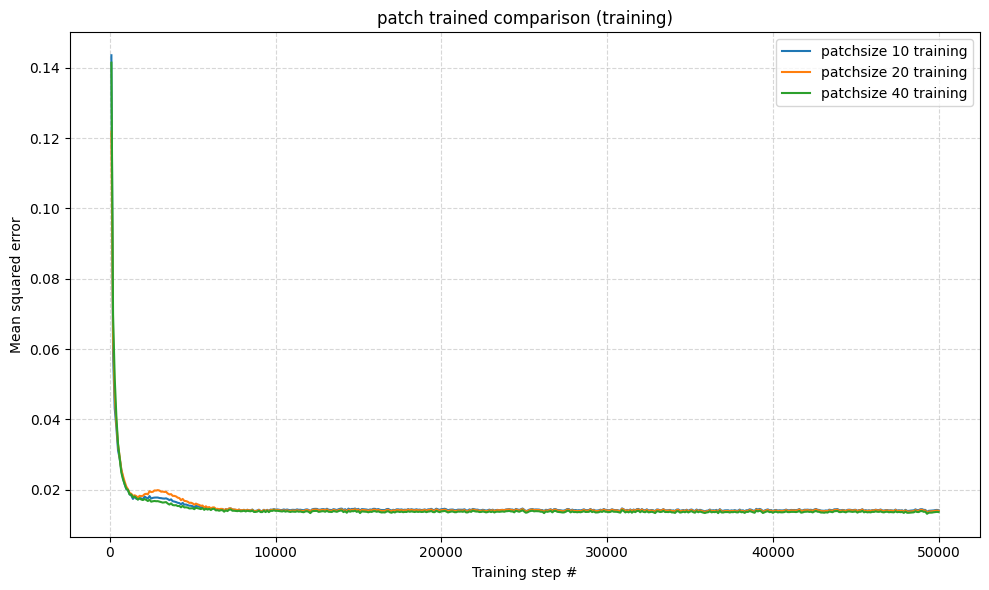

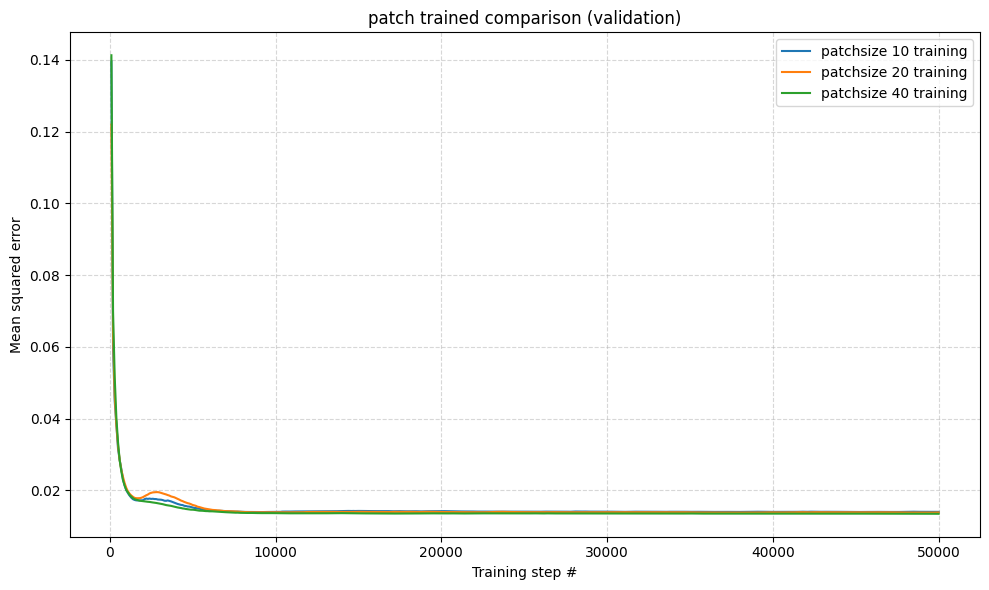

In [19]:
plot_datasplit_mse([baseline_patchsize_10, baseline_patchsize_20, baseline_patchsize_40], ['patchsize 10 baseline', 'patchsize 20 baseline', 'patchsize 40 baseline'], 'patch baseline comparison')
plot_datasplit_mse([patch_trained_patchsize_10, patch_trained_patchsize_20, patch_trained_patchsize_40], ['patchsize 10 training', 'patchsize 20 training', 'patchsize 40 training'], 'patch trained comparison')

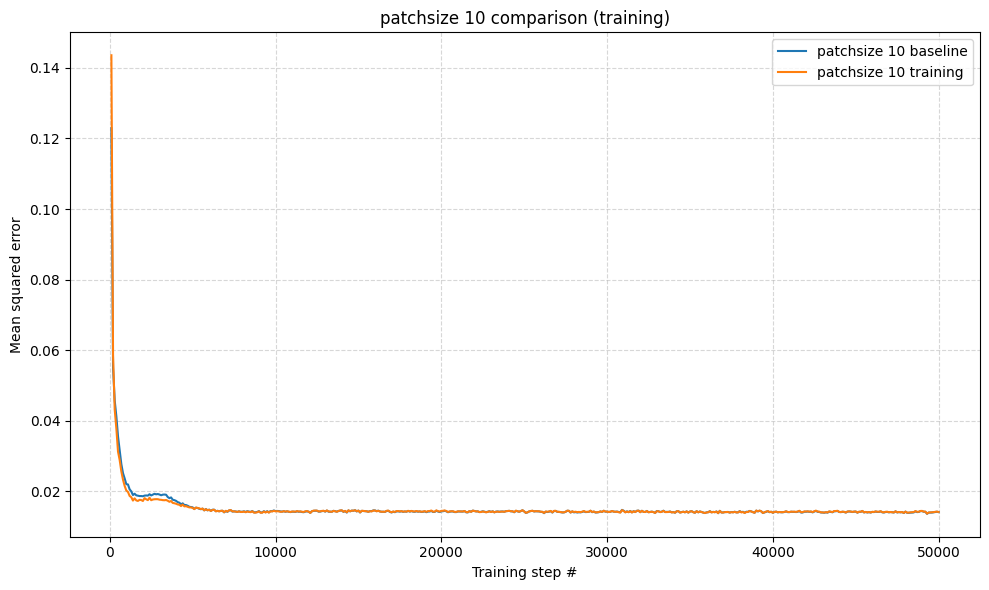

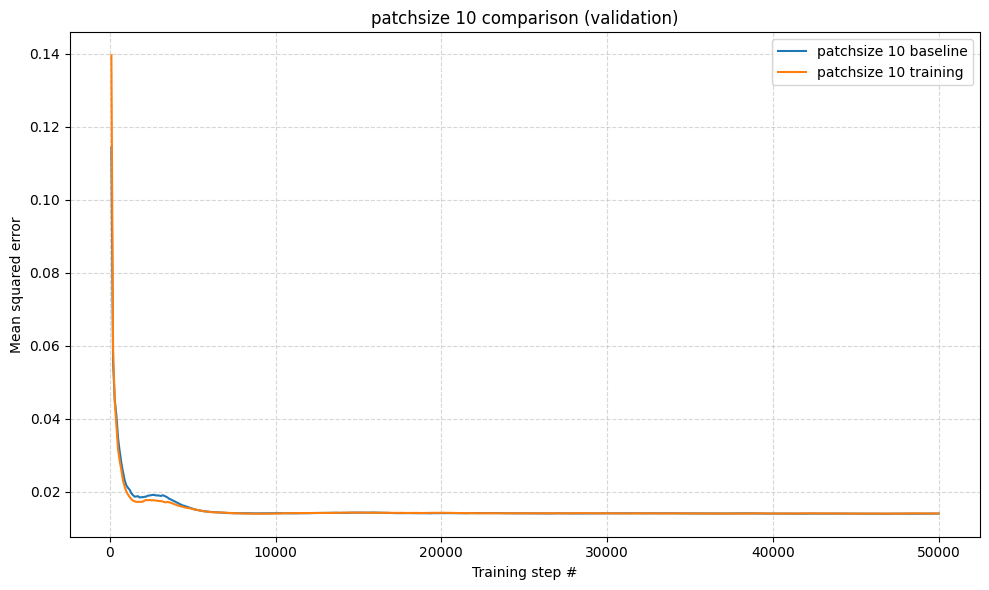

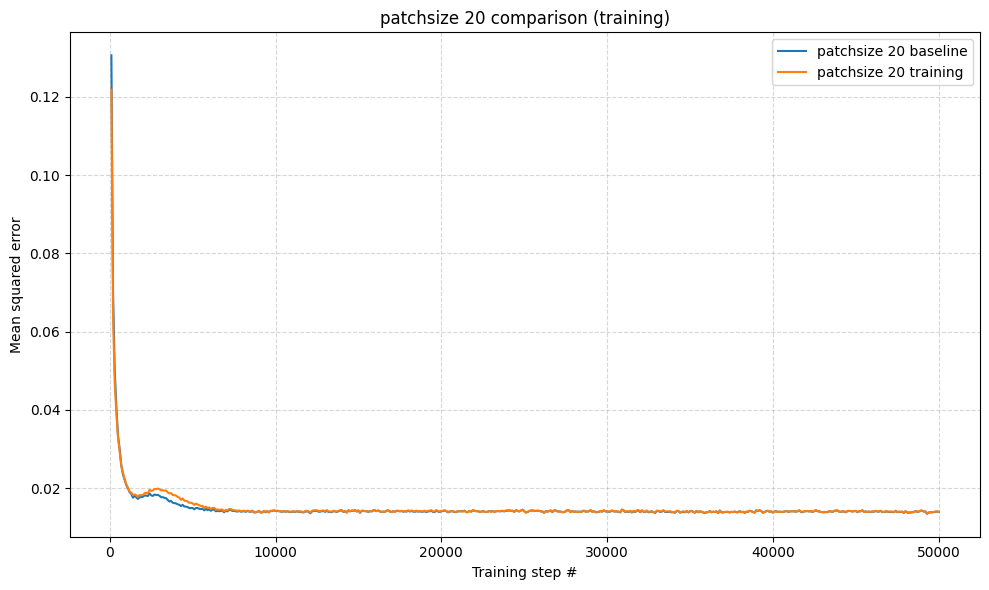

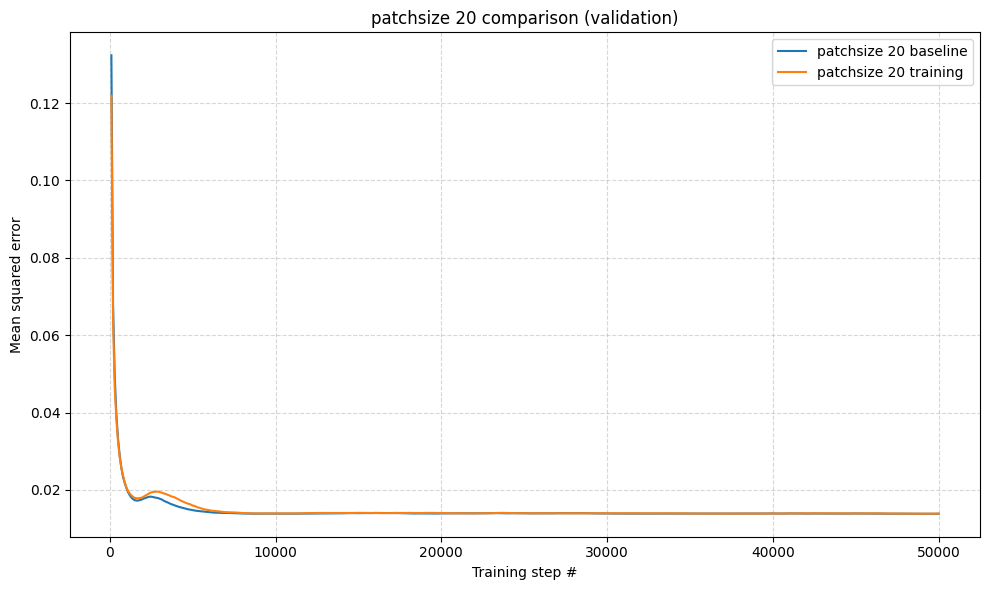

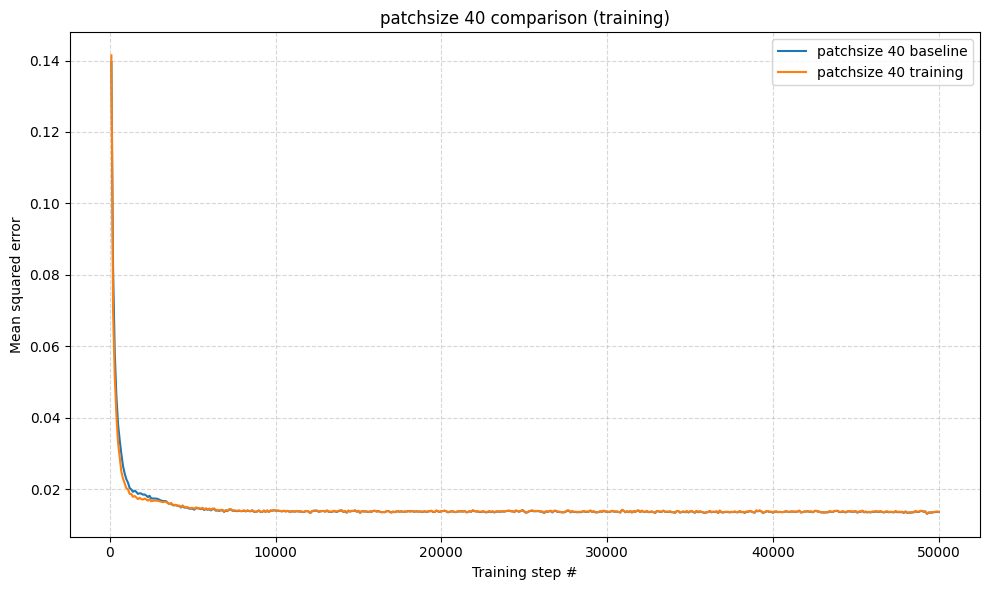

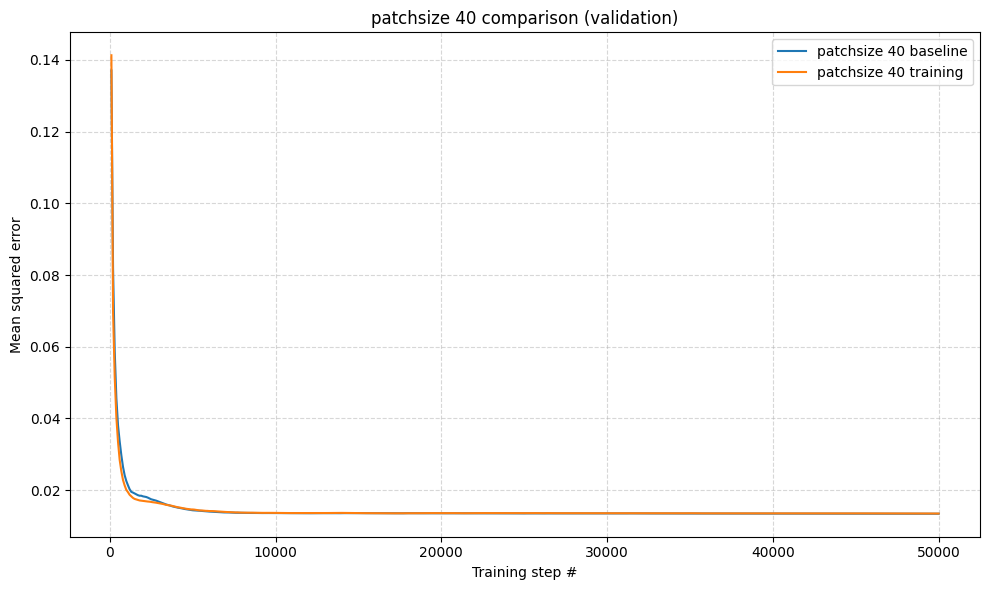

In [20]:
plot_datasplit_mse([baseline_patchsize_10, patch_trained_patchsize_10], ['patchsize 10 baseline', 'patchsize 10 training'], 'patchsize 10 comparison')
plot_datasplit_mse([baseline_patchsize_20, patch_trained_patchsize_20], ['patchsize 20 baseline', 'patchsize 20 training'], 'patchsize 20 comparison')
plot_datasplit_mse([baseline_patchsize_40, patch_trained_patchsize_40], ['patchsize 40 baseline', 'patchsize 40 training'], 'patchsize 40 comparison')